In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Opening Data

In [2]:
data = pd.read_csv('/Users/kloeyap/Documents/allbirds-data.csv')
data.head()

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,CLICKSTREAM_EVENTS_TOTAL.1,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,...,89.0,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,...,125.0,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,...,99.0,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,...,100.0,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle
4,977a1dca605edc6c0e93790c1a4db477b46139cf3beca2...,NaN,NaN,14,14,NaN,2023-01-26T11:36:23.587Z,2023-01-26T11:45:18.987Z,NaN,product_viewed,...,49.0,4.812500,womens-natural-legging,Natural Legging,Shadow,Apparel,Bottom,Womens,Other Bottom,Essentials


#### Drop repeated column

In [3]:
data = data.drop(['CLICKSTREAM_EVENTS_TOTAL.1'], axis=1)

In [4]:
data.columns

Index(['USER_ID', 'COUNTRY', 'DERIVED_GENDER_BY_NAME',
       'CLICKSTREAM_EVENTS_TOTAL', 'FIRST_PURCHASE_AT', 'FIRST_VISIT_AT',
       'LATEST_VISIT_AT', 'LATEST_PURCHASE_AT', 'EVENT_NAME',
       'EVENT_TIMESTAMP', 'ITEM_ID', 'PRICE_INFORMATION', 'AVG_REVIEW_SCORE',
       'STYLE', 'TAXONOMY_STYLE', 'COLOR_NAME', 'PRODUCT_CLASS',
       'PRODUCT_SUBCLASS', 'TEAM', 'FRANCHISE', 'PRODUCT_GROUP'],
      dtype='object')

### Checking Outliers

In [5]:
max(data['PRICE_INFORMATION'])
data[data['PRICE_INFORMATION'] == 195000].head()

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
82838,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:29:01.222Z,...,195000.0,4.750000,womens-wool-runner-up-mizzles,Wool Runner-up Mizzle,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle
93197,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:26:30.726Z,...,195000.0,4.619048,womens-wool-runner-up-mizzles,Wool Runner-up Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Womens,Runner,Lifestyle
179305,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:27:53.953Z,...,195000.0,4.666667,NaN,Wool Runner-up Mizzle,Tuke Jo,Footwear,Shoe,Womens,Runner,Lifestyle
321761,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:29:39.297Z,...,195000.0,4.750000,womens-wool-runner-up-mizzles,Wool Runner-up Mizzle,Natural Grey,Footwear,Shoe,Womens,Runner,Lifestyle
321984,90bf5a84b06460c65639b7133ba2e03f48a169506e7ee2...,South Korea,NaN,77,2023-07-20T01:40:22Z,2023-07-20T01:24:52.8Z,2023-07-20T01:40:39.699Z,2023-07-22T06:07:25Z,product_viewed,2023-07-20T01:30:07.916Z,...,195000.0,4.619048,womens-wool-runner-up-mizzles,Wool Runner-up Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Womens,Runner,Lifestyle


In [6]:
data[data['PRICE_INFORMATION'] == min(data['PRICE_INFORMATION'])].head()

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
1140228,dc17b04f7940752654eca72430ae365a10b5bee562b4fc...,United States,M,42,2023-01-05T19:46:33Z,2022-12-19T16:51:35.587Z,2023-03-07T15:47:45.686Z,2023-01-23T16:21:11Z,return,2023-01-12T21:31:39Z,...,-522.5,4.620155,womens-wool-runners,Wool Runner,Natural White (Cream),Footwear,Shoe,Womens,Runner,Lifestyle


The highest cost of an item is 195,000 which all belong to South Korea, so this is an indicator that it might be in South Korean currency. However, for the lowest price, there is an error since it is impossible to have negative price. This will need to be fixed.

### Looking into Country Data

In [5]:
data.groupby('COUNTRY')[['COUNTRY']].count().rename(columns={'COUNTRY' : 'count'}).sort_values(by=['count'], ascending=False)

,count
COUNTRY,
United States,1338448
Canada,2301
South Korea,1499
United Kingdom,897
Philippines,789
...,...
Italy,4
Jersey,2
Iceland,1


In [7]:
data.groupby('EVENT_NAME')['USER_ID'].count()

EVENT_NAME
cart_viewed         118718
exchange              1186
order                54160
product_added        68532
product_removed      42926
product_viewed     1227156
return                8238
Name: USER_ID, dtype: int64

## Focusing on United States

In [7]:
usdata = data[data['COUNTRY'] == 'United States']
usdata.head()

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,...,89.0,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,...,125.0,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,...,99.0,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,...,100.0,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle
6,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,...,89.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active


In [11]:
usdata['PRODUCT_CLASS'].unique()

array(['Footwear', 'Apparel', 'Accessories'], dtype=object)

In [27]:
def fix_price(row):
    if row['PRODUCT_CLASS'] == 'Footwear':
        if row['PRICE_INFORMATION'] < 90:
            return 90
        elif row['PRICE_INFORMATION'] > 140:
            return 140
    if row['PRODUCT_SUBCLASS'] == 'Underwear':
        if row['PRICE_INFORMATION'] < 0 or row['PRICE_INFORMATION'] > 30:
            return 19
    if row['PRODUCT_SUBCLASS'] == 'Headwear':
        if row['PRICE_INFORMATION'] < 0 or row['PRICE_INFORMATION'] > 30:
            return 30
    if row['PRODUCT_SUBCLASS'] == 'Top':
          if row['PRICE_INFORMATION'] < 0:
              return 50
    return row['PRICE_INFORMATION']

usdata['PRICE_INFORMATION'] = usdata.apply(fix_price, axis=1)
usdata

/var/folders/9p/yr0zjmp51xb08j2kgckf5t780000gn/T/ipykernel_7411/1311240143.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdata['PRICE_INFORMATION'] = usdata.apply(fix_price, axis=1)


,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,2023-03-19T20:13:09.805Z,...,90.0,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,2023-09-02T15:44:54.238Z,...,125.0,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,2023-03-18T15:37:22.058Z,...,99.0,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,2023-06-01T15:22:26.611Z,...,100.0,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle
6,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,2023-03-21T00:02:33.844Z,...,90.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520910,c9cbb7af7adfd20fddc3f399823e7fcdc0d2ffb8edbed4...,United States,F,826,2019-05-27T16:54:05Z,2021-10-17T19:34:37.49Z,2023-09-09T18:25:57.066Z,2023-09-04T13:15:50Z,return,2023-05-13T22:17:54Z,...,90.0,4.200000,womens-tree-dasher-relay,Tree Dasher Relay,Natural Black (Buoyant Mint),Footwear,Slip-On,Womens,Dasher,Active
1520911,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,F,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,2023-04-26T05:34:16Z,...,105.0,5.000000,womens-tree-runners,Tree Runner,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle
1520912,464903c103bfabc8c3e1b5866d9f62ceef8edf8f7d3b78...,United States,NaN,98,2023-03-12T23:02:49Z,2023-03-10T15:17:41.833Z,2023-03-17T15:47:37.688Z,2023-03-27T19:52:48Z,return,2023-03-27T19:52:48Z,...,90.0,4.190000,mens-wool-runner-mizzles,Wool Runner Mizzle,Natural Grey,Footwear,Shoe,Mens,Runner,Lifestyle
1520913,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,NaN,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,2023-01-31T00:14:01Z,...,90.0,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active


In [29]:
usdata[usdata['PRICE_INFORMATION'] == max(usdata['PRICE_INFORMATION'])]

,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,EVENT_TIMESTAMP,...,PRICE_INFORMATION,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP
1227282,efefb3cfd26bcd908a64f83a2c1f6c5a006b784e1c9375...,United States,NaN,1268,2019-08-24T10:32:20Z,2022-04-12T15:09:34.569Z,2023-08-30T14:43:46.452Z,2023-06-27T21:30:19Z,product_viewed,2023-06-27T21:21:05.528Z,...,5000.0,4.5,mens-camp-shirt,The Camp Shirt,Dryad,Apparel,Top,Mens,Other Top,Essentials


In [19]:
usdata[usdata['TAXONOMY_STYLE'] == 'Boxer Brief'].max()

/var/folders/9p/yr0zjmp51xb08j2kgckf5t780000gn/T/ipykernel_7411/881156571.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  usdata[usdata['TAXONOMY_STYLE'] == 'Boxer Brief'].max()


USER_ID                     fff06b6d30cfbc1cc2870c447de35280ec24f10363e31a...
COUNTRY                                                         United States
CLICKSTREAM_EVENTS_TOTAL                                                14793
FIRST_VISIT_AT                                       2023-09-16T13:45:44.964Z
LATEST_VISIT_AT                                      2023-09-20T08:02:44.263Z
EVENT_NAME                                                             return
EVENT_TIMESTAMP                                      2023-09-19T18:52:20.848Z
ITEM_ID                                     color-mens-trino-boxer-brief-pine
PRICE_INFORMATION                                                       199.5
AVG_REVIEW_SCORE                                                          5.0
STYLE                                                  mens-trino-boxer-brief
TAXONOMY_STYLE                                                    Boxer Brief
COLOR_NAME                                                      

In [24]:
min(usdata['PRICE_INFORMATION'])

# cap price for upper (125) and lower ()
# socks: $20
# footwear: $90 - $140
# apparel : more wide ranging, $30-150-200

-522.5

In [9]:
usdata.groupby('EVENT_NAME')['USER_ID'].count()

EVENT_NAME
cart_viewed         107657
exchange              1151
order                50224
product_added        61794
product_removed      38492
product_viewed     1071359
return                7771
Name: USER_ID, dtype: int64

In [10]:
usdata.groupby('USER_ID')['CLICKSTREAM_EVENTS_TOTAL'].count()

USER_ID
000020716b48cd6631238cb02ad9d3dbe7356788370dd09ac828b08f475c5441    32
000032e76e46b92d24125de9bbfc057c4cdc142226ad1ff24963af4436ea1600     2
0000d72c11da8d802669129c7e932f31f12ee984cd1407aa67d8a17d85d4f4a2     7
0000e497ac4466a3ab379553b1e1aef39acfbef0b4d322253184b2ae5f97c32b     3
00010774413211beb5f5bd5b2108100ef1847737060b8ac2398f952247caea42    24
                                                                    ..
fffd2ae04e0eb5d96a880d4685ae17371da4b2a3fc419f75c2bef70e1268e515    16
fffd5533e6c478575f7849512827718e886638d39c6889a471bff8e3cfe12b2f     1
fffd77572a2eb75231ef9897ffe58d4214aa130e654b28a1b1a6998d945c4003     1
fffe3902f43e99d1d5cdbd98a0c0aa29e2fd585f301fada0dbaf92f577fad975    15
ffff778a3687002b739becbed38c927cd198a12bfc09dd48554040056010fc0a     2
Name: CLICKSTREAM_EVENTS_TOTAL, Length: 93157, dtype: int64

In [11]:
user_item_interaction = usdata.groupby(['USER_ID', 'ITEM_ID'])['EVENT_NAME'].count().reset_index()
user_item_interaction


,USER_ID,ITEM_ID,EVENT_NAME
0,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers,1
1,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers-blizzard,1
2,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers-crest,1
3,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers-cyclone,1
4,000020716b48cd6631238cb02ad9d3dbe7356788370dd0...,color-mens-tree-dashers-erupt,1
...,...,...,...
467227,fffd77572a2eb75231ef9897ffe58d4214aa130e654b28...,color-mens-tree-runners-jet-black-black,1
467228,fffe3902f43e99d1d5cdbd98a0c0aa29e2fd585f301fad...,color-mens-wool-runner-up-mizzles,14
467229,fffe3902f43e99d1d5cdbd98a0c0aa29e2fd585f301fad...,color-mens-wool-runner-up-mizzles-natural-blac...,1
467230,ffff778a3687002b739becbed38c927cd198a12bfc09dd...,color-mens-tree-loungers-natural-black-blizzard,1


## Looking into Orders Only

In [12]:
ordered_items = usdata[usdata['EVENT_NAME'] == 'order'][['USER_ID', 'EVENT_NAME', 'STYLE']]
ordered_items

,USER_ID,EVENT_NAME,STYLE
15679,aa91d8a4c866014c4d89c5fcd994eb9c8c4572fb2bdd29...,order,womens-tree-breezers
15708,e9e16a353dde36b41910cb20916fc7a9ffec3500aa6fcd...,order,womens-wool-runners
15709,ec43cd91bda58410e1c2bb725ae8857423416ccc8d6b80...,order,womens-tree-breezers
23689,6888be99b3c4994bc68a82c7ee5320fdcfcba5a41865ee...,order,mens-tree-dasher-relay
23707,b32a81bbd2da625ecccd48ba71d9f2dd528c11ca64aca5...,order,sugar-sliders
...,...,...,...
1520903,6c7d1582fc400d9112013930a4edd167dfde8918ee401c...,order,anytime-ankle-sock
1520909,08868051524d2f577d5844707da634d26da6afa0c413a2...,order,anytime-ankle-sock
1520911,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,order,womens-tree-runners
1520913,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,order,mens-tree-dashers-1


In [13]:
ordered_items_count = ordered_items.groupby('STYLE')[['USER_ID']].count()
ordered_items_count = ordered_items_count.sort_values(by = 'USER_ID', ascending=False).head(5)

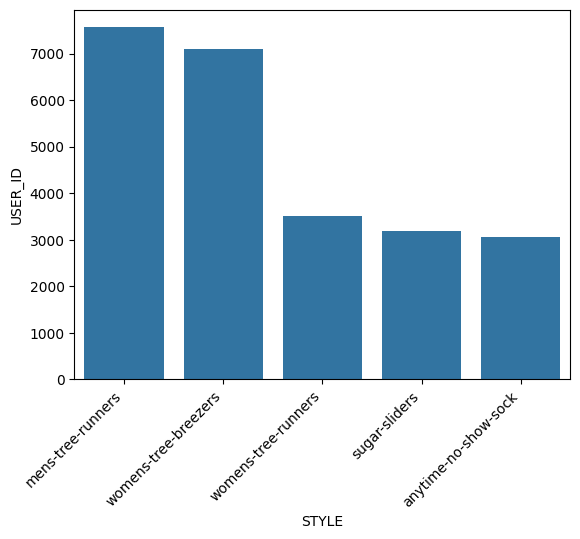

In [14]:
sns.barplot(ordered_items_count, x='STYLE', y='USER_ID')
plt.xticks(rotation=45, ha="right");

In [15]:
prod_interactions = usdata.groupby('STYLE')[['STYLE']].count().rename(columns = {'STYLE' : 'count'})
prod_interactions.sort_values(by='count', ascending=False)

,count
STYLE,
womens-tree-breezers,241077
mens-wool-runners,106856
mens-tree-runners,100886
sugar-sliders,89159
womens-wool-runners,88298
...,...
womens-wool-jumper,1
womens-camp-short,1
mens-wool-jumper,1


In [16]:
ordered_items.merge(prod_interactions, on='STYLE', how='left').sort_values(by= 'count', ascending=False)

,USER_ID,EVENT_NAME,STYLE,count
0,aa91d8a4c866014c4d89c5fcd994eb9c8c4572fb2bdd29...,order,womens-tree-breezers,241077.0
37638,bcc94b8b6ec9f61e0f7d0c553309b34f117c522dbc2051...,order,womens-tree-breezers,241077.0
25028,615deb16d0f5cd621295deb4177aaa60dc887d5a74f55d...,order,womens-tree-breezers,241077.0
25027,157073980df59fc4cefc698fa61e525dca1b6bc0c7145f...,order,womens-tree-breezers,241077.0
25020,ab89ed072808139f61d24629c8aeecc127a631af3021ac...,order,womens-tree-breezers,241077.0
...,...,...,...,...
44981,abb258e9353b73f1f2efa82c6735c537722c1df708611f...,order,NaN,NaN
45393,3d569a8b576a0e3d15d4351cea3574fdb2acf27dedb507...,order,NaN,NaN
46574,469e90b321840193e7602e30b8cfc94bd5faf20a0fab2e...,order,NaN,NaN
48946,bac9e6b996e1c2771a0cdb9aa6310f3ee9074005bc3bc1...,order,NaN,NaN


In [17]:
def quantify_target_variable(row):
    if row == 'order':
        return 1
    else:
        return 0
    
usdata['TARGET'] = usdata['EVENT_NAME'].apply(quantify_target_variable)
usdata

/var/folders/9p/yr0zjmp51xb08j2kgckf5t780000gn/T/ipykernel_1183/4236085599.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdata['TARGET'] = usdata['EVENT_NAME'].apply(quantify_target_variable)


,USER_ID,COUNTRY,DERIVED_GENDER_BY_NAME,CLICKSTREAM_EVENTS_TOTAL,CLICKSTREAM_EVENTS_TOTAL.1,FIRST_PURCHASE_AT,FIRST_VISIT_AT,LATEST_VISIT_AT,LATEST_PURCHASE_AT,EVENT_NAME,...,AVG_REVIEW_SCORE,STYLE,TAXONOMY_STYLE,COLOR_NAME,PRODUCT_CLASS,PRODUCT_SUBCLASS,TEAM,FRANCHISE,PRODUCT_GROUP,TARGET
0,6c80a69aee886436e29279ea32a8e01c8d6bd9245f06e4...,United States,M,763,763,2019-12-30T02:13:39Z,2021-11-30T06:48:50.362Z,2023-08-09T02:12:47.304Z,2023-06-23T00:17:33Z,product_viewed,...,3.960000,mens-tree-dashers-1,Tree Dasher,Pukeko (White),Footwear,Shoe,Mens,Dasher,Active,0
1,aa9eb022ab1bf8dd03f7a08d0bfc7cebee6bbddd20a338...,United States,NaN,341,341,2019-09-25T13:54:27Z,2021-09-14T11:41:14.862Z,2023-09-08T00:59:06.069Z,2022-12-03T18:38:07Z,product_viewed,...,4.268293,mens-wool-runner-mizzles,Wool Runner Mizzle,Ntrl Blck (Rggd Khk),Footwear,Shoe,Mens,Runner,Lifestyle,0
2,09c26d7b27b81279453efb2cc8a2743f694cafcdb6c188...,United States,M,126,126,2023-02-24T14:09:29Z,2023-02-10T16:07:07.678Z,2023-08-21T14:41:36.74Z,2023-03-18T15:46:02Z,product_viewed,...,4.800000,mens-trail-runners-swt,Trail Runner SWT,Mdm Gry (Rggd Khk),Footwear,Shoe,Mens,Trail,Active,0
3,9976c812700600d29fd5f72e47b0f503ea9f9007e68873...,United States,F,41,41,2023-06-01T15:25:38Z,2023-06-01T15:22:17.951Z,2023-06-01T15:26:07.661Z,2023-06-01T15:25:38Z,product_viewed,...,4.111111,womens-tree-breezers,Tree Breezer,Navy Night (Dark Navy),Footwear,Shoe,Womens,Breezer,Lifestyle,0
6,6177b6a7d95e1503f45acedbbf2d9311b064792450364f...,United States,M,479,479,2022-12-30T12:11:36Z,2022-05-13T16:50:27.423Z,2023-08-30T14:55:31.603Z,2022-12-30T12:11:36Z,product_viewed,...,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520910,c9cbb7af7adfd20fddc3f399823e7fcdc0d2ffb8edbed4...,United States,F,826,826,2019-05-27T16:54:05Z,2021-10-17T19:34:37.49Z,2023-09-09T18:25:57.066Z,2023-09-04T13:15:50Z,return,...,4.200000,womens-tree-dasher-relay,Tree Dasher Relay,Natural Black (Buoyant Mint),Footwear,Slip-On,Womens,Dasher,Active,0
1520911,550212b69e2c8fa7e2ff4307e5099ed9a6474405e2c705...,United States,F,32,32,2017-11-05T00:22:38Z,2023-04-17T01:11:52.943Z,2023-04-26T05:34:20.098Z,2023-04-26T05:34:16Z,order,...,5.000000,womens-tree-runners,Tree Runner,Wheat (Dark Beige),Footwear,Shoe,Womens,Runner,Lifestyle,1
1520912,464903c103bfabc8c3e1b5866d9f62ceef8edf8f7d3b78...,United States,NaN,98,98,2023-03-12T23:02:49Z,2023-03-10T15:17:41.833Z,2023-03-17T15:47:37.688Z,2023-03-27T19:52:48Z,return,...,4.190000,mens-wool-runner-mizzles,Wool Runner Mizzle,Natural Grey,Footwear,Shoe,Mens,Runner,Lifestyle,0
1520913,d3cfe92c3885b6aa6e7dc5777a33d3c858d55f7c5e96a6...,United States,NaN,59,59,2023-01-31T00:14:01Z,2023-01-31T00:02:35.715Z,2023-01-31T03:03:26.97Z,2023-01-31T00:14:01Z,order,...,4.682353,mens-tree-dashers-1,Tree Dasher,Geyser (Light Blue),Footwear,Shoe,Mens,Dasher,Active,1


Text(0.5, 1.0, 'Correlation Matrix')

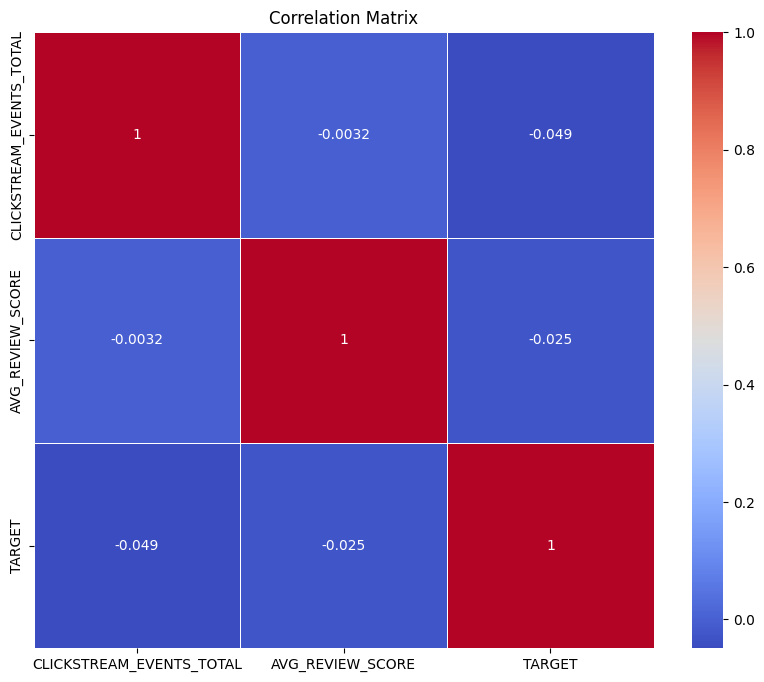

In [18]:
columns_to_keep = ['CLICKSTREAM_EVENTS_TOTAL', 'AVG_REVIEW_SCORE', 'TARGET']
filtered_data = usdata[columns_to_keep]

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')


In [19]:
style_user_count = usdata.groupby(['STYLE', 'USER_ID'])[['STYLE']].count().rename(columns = {'STYLE' : 'count'})
style_user_count

count
STYLE               USER_ID                                                  
anytime-ankle-sock  000032e76e46b92d24125de9bbfc057c4cdc142226ad1ff...      2
                    0007f23c5fab60f5061bdca93da066e6b4d1ff21aedc5e7...      4
                    000d67598fe0fda3c26c57c524569c8fb9eae73e02742e5...     17
                    003bb1bf5dd06578c649eadb792d77ae4987ed71495d0d9...      2
                    004596e25e5be5d106e758b535ab06a04219302ad2943ae...      1
...                                                                       ...
womens-wool-runners fff2db82b7475903bfcf9c526c8c442e425539dfbbedbb1...      9
                    fff36cee27d4de751e98966f3a356703a53d65105214290...     26
                    fff40848705c05dee5c24ff7974d6e0c66bb25973e54c82...      7
                    fffa66c57dfc27e673dc102c8514c446b1f86d06a863e49...      8
                    fffbc53c41cd2df7ac5754443ab63b8a1f20790c5450632...     19

[218265 rows x 1 columns]